In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xverse.transformer import MonotonicBinning
from xverse.transformer import WOE
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



DATA LOADING

In [2]:
pcos_df = pd.read_excel('PCOS_data_without_infertility.xlsx',sheet_name='Full_new')


In [3]:
pcos_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## DATA PREPROCESSING 
- Data cleaning
- Data transformaton
- Data integration

In [ ]:
pcos_df=pcos_df.drop(['Sl. No','Patient File No.','Unnamed: 44'],axis=1)

In [ ]:
#Changing datatypes of ' II    beta-HCG(mIU/mL)' and 'AMH(ng/mL)' 
pcos_df["AMH(ng/mL)"] = pd.to_numeric(pcos_df["AMH(ng/mL)"], errors='coerce')
pcos_df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos_df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
pcos_df.info()

In [ ]:
pcos_df.isnull().sum()

In [ ]:
pcos_df.columns

In [ ]:
pcos_df.columns[:1]

In [ ]:
pcos_df.columns[1:]

## MISSING VALUE TREATMENT

In [ ]:
#dropping null values
pcos_df=pcos_df.dropna()

In [6]:
pcos_df.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [7]:
pcos_df

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [8]:
target_variable=pcos_df['Target']

In [9]:
variables = pcos_df.columns[1:].to_list()

In [10]:
len(variables)

41

In [11]:
variables

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [12]:
pcos_df

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


# EDA

Text(0.5, 1.0, "People who doesn't have PCOS and who have PCOS")

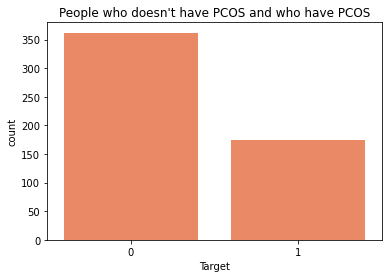

In [13]:
sns.countplot(target_variable,color='coral')
plt.title("People who doesn't have PCOS and who have PCOS")

{'whiskers': [<matplotlib.lines.Line2D at 0x164d69bb1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x164d69bb880>,
 'boxes': [<matplotlib.patches.PathPatch at 0x164d69addc0>],
 'medians': [<matplotlib.lines.Line2D at 0x164d69bbf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x164d69c9280>],
 'means': []}

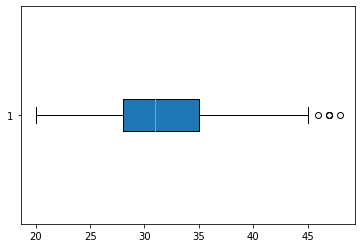

In [14]:
plt.boxplot(pcos_df[' Age (yrs)'], patch_artist=True, vert=False)

In [15]:
target_variable.value_counts()

0    362
1    175
Name: Target, dtype: int64

In [16]:
pcos_df.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [17]:
pcos_df

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [18]:
pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  537 non-null    int64  
 1    Age (yrs)              537 non-null    int64  
 2   Weight (Kg)             537 non-null    float64
 3   Height(Cm)              537 non-null    float64
 4   BMI                     537 non-null    float64
 5   Blood Group             537 non-null    int64  
 6   Pulse rate(bpm)         537 non-null    int64  
 7   RR (breaths/min)        537 non-null    int64  
 8   Hb(g/dl)                537 non-null    float64
 9   Cycle(R/I)              537 non-null    int64  
 10  Cycle length(days)      537 non-null    int64  
 11  Marraige Status (Yrs)   537 non-null    float64
 12  Pregnant(Y/N)           537 non-null    int64  
 13  No. of aborptions       537 non-null    int64  
 14    I   beta-HCG(mIU/mL)  537 non-null    fl

## Feature Selection using WOE and IV

In [19]:
X= pcos_df.drop(labels = ["Target"],axis = 1)
y=pcos_df.Target

### monotic binning

In [20]:
#from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

print(clf.bins)

{' Age (yrs)': array([20., 29., 34., 48.]), 'Weight (Kg)': array([ 31.,  55.,  63., 108.]), 'Height(Cm) ': array([137.   , 153.   , 158.496, 180.   ]), 'BMI': array([12.41788175, 22.6       , 25.74067218, 38.9       ]), 'Blood Group': array([11., 13., 15., 18.]), 'Pulse rate(bpm) ': array([13., 72., 74., 82.]), 'RR (breaths/min)': array([16., 18., 20., 28.]), 'Hb(g/dl)': array([ 8.5, 10.8, 11.5, 14.8]), 'Cycle(R/I)': array([2., 4., 5.]), 'Cycle length(days)': array([ 0.,  5., 12.]), 'Marraige Status (Yrs)': array([ 0.,  5.,  9., 30.]), 'Pregnant(Y/N)': array([0., 1.]), 'No. of aborptions': array([0., 1., 5.]), '  I   beta-HCG(mIU/mL)': array([1.300000e+00, 1.990000e+00, 1.775700e+02, 3.246097e+04]), 'II    beta-HCG(mIU/mL)': array([9.90000000e-01, 1.99000000e+00, 1.20566667e+01, 2.50000000e+04]), 'FSH(mIU/mL)': array([2.10000000e-01, 3.84666667e+00, 5.75333333e+00, 5.05200000e+03]), 'LH(mIU/mL)': array([2.00000000e-02, 1.44666667e+00, 3.24000000e+00, 2.01800000e+03]), 'FSH/LH': array([

### Weight of Evidence (WOE) and Information Value (IV)

In [21]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

print(clf.woe_df.head())

C:\Users\ajiva\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


            Variable_Name                    Category  Count  Event  \
0    I   beta-HCG(mIU/mL)  (1.2990000000000002, 1.99]    197     54   
1    I   beta-HCG(mIU/mL)              (1.99, 177.57]    162     55   
2    I   beta-HCG(mIU/mL)          (177.57, 32460.97]    178     66   
3               Age (yrs)              (19.999, 29.0]    212     89   
4               Age (yrs)                (29.0, 34.0]    168     54   

   Non_Event  Event_Rate  Non_Event_Rate  Event_Distribution  \
0        143    0.274112        0.725888            0.308571   
1        107    0.339506        0.660494            0.314286   
2        112    0.370787        0.629213            0.377143   
3        123    0.419811        0.580189            0.508571   
4        114    0.321429        0.678571            0.308571   

   Non_Event_Distribution       WOE  Information_Value  
0                0.395028 -0.247002           0.035918  
1                0.295580  0.061363           0.035918  
2                

### Information Value

In [22]:
iv_df=clf.iv_df
iv_df

,Variable_Name,Information_Value
16,Follicle No. (R),2.362598
15,Follicle No. (L),1.576713
33,Skin darkening (Y/N),1.046019
40,hair growth(Y/N),0.967139
39,Weight gain(Y/N),0.909455
14,Fast food (Y/N),0.723831
10,Cycle(R/I),0.708435
27,Pimples(Y/N),0.410602
2,AMH(ng/mL),0.359183
5,BMI,0.176560


Feature elimination
- Features having IV less than 0.1 are eliminated since they are weak predictors

In [23]:
iv_thre=0.1
iv=iv_df [["Variable_Name", "Information_Value"]]. drop_duplicates ()
x_columns=iv.Variable_Name [iv.Information_Value>iv_thre]
x_columns

16        Follicle No. (R)
15        Follicle No. (L)
33    Skin darkening (Y/N)
40        hair growth(Y/N)
39        Weight gain(Y/N)
14         Fast food (Y/N)
10              Cycle(R/I)
27            Pimples(Y/N)
2               AMH(ng/mL)
5                      BMI
1                Age (yrs)
17          Hair loss(Y/N)
38             Weight (Kg)
3     Avg. F size (L) (mm)
20               Hip(inch)
Name: Variable_Name, dtype: object

In [24]:

len(x_columns)

15

In [25]:
pcos_dfnw=pcos_df[['Follicle No. (R)', 
                   'Follicle No. (L)',
                  'Skin darkening (Y/N)',
                  'hair growth(Y/N)',
                  'Weight gain(Y/N)',
                  'Fast food (Y/N)',
                  'Cycle(R/I)',
                  'AMH(ng/mL)',
                  'Pimples(Y/N)',
                  'BMI',
                  ' Age (yrs)',
                  'Hair loss(Y/N)',
                  'Weight (Kg)',
                  'Avg. F size (L) (mm)',
                  'Hip(inch)',
                  
                   'Target'
                  ]]

In [26]:
X_= pcos_dfnw.drop(labels = ["Target"],axis = 1)
y_=pcos_dfnw.Target

Transformation

In [27]:
X_t=clf.transform(X_)

In [28]:
X_t.head()

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Fast food (Y/N),Cycle(R/I),AMH(ng/mL),Pimples(Y/N),BMI,Age (yrs),Hair loss(Y/N),Weight (Kg),Avg. F size (L) (mm),Hip(inch)
0,-2.333413,-1.490367,-0.810335,-0.708226,-0.89702,0.719638,-0.60554,-0.424597,-0.720061,-0.625068,0.403310,-0.362704,-0.412576,0.023761,-0.265070
1,-0.503090,-1.490367,-0.810335,-0.708226,-0.89702,-1.069396,-0.60554,-0.424597,-0.720061,0.125061,-0.635720,-0.362704,0.442471,0.405951,-0.198091
2,1.890009,1.602327,-0.810335,-0.708226,-0.89702,0.719638,-0.60554,0.782739,0.590283,0.125061,-0.020356,0.386152,0.442471,0.023761,0.463441
3,-2.333413,-1.490367,-0.810335,-0.708226,-0.89702,-1.069396,-0.60554,-0.424597,-0.720061,0.399955,-0.635720,-0.362704,0.442471,0.405951,0.463441
4,-2.333413,-1.490367,-0.810335,-0.708226,-0.89702,-1.069396,-0.60554,-0.424597,-0.720061,-0.625068,0.403310,0.386152,-0.412576,0.405951,-0.265070


Implementing the model

In [29]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_t)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.246440
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.610     
Dependent Variable:   Target           AIC:              294.6770  
Date:                 2021-05-04 04:48 BIC:              358.9670  
No. Observations:     537              Log-Likelihood:   -132.34   
Df Model:             14               LL-Null:          -338.97   
Df Residuals:         522              LLR p-value:      2.0343e-79
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Follicle No. (R)      0.9768   0.1346  7.2589 0.0000  0.7130 1.2405
Follicle No. (L)      0.2507   0.1526  1.

In [30]:
#Eliminating variables having p-values greater than 0.05
cols=['Follicle No. (R)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 
      'Pimples(Y/N)',' Age (yrs)'] 
X_m=X_t[cols]

logit_model=sm.Logit(y,X_m)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.258879
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.590     
Dependent Variable: Target           AIC:              292.0361  
Date:               2021-05-04 04:48 BIC:              322.0381  
No. Observations:   537              Log-Likelihood:   -139.02   
Df Model:           6                LL-Null:          -338.97   
Df Residuals:       530              LLR p-value:      2.9370e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Follicle No. (R)      1.1031   0.1136 9.7120 0.0000 0.8805 1.3258
Skin darkening (Y/N)  0.6354   0.1548 4.1033 0.0000 0.3319 0.9389


In [31]:
X_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 540
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Follicle No. (R)      537 non-null    float64
 1   Skin darkening (Y/N)  537 non-null    float64
 2   hair growth(Y/N)      537 non-null    float64
 3   Weight gain(Y/N)      537 non-null    float64
 4   Cycle(R/I)            537 non-null    float64
 5   Pimples(Y/N)          537 non-null    float64
 6    Age (yrs)            537 non-null    float64
dtypes: float64(7)
memory usage: 33.6 KB


### Oversampling

In [32]:

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_m, y, test_size=0.25, random_state=0)

X_over = pd.concat([X_train, y_train], axis=1)

not_pcos = X_over[X_over.Target==0]
pcos = X_over[X_over.Target==1]

pcos_upsampled = resample(pcos,
                          replace=True, 
                          n_samples=len(not_pcos), 
                          random_state=27) 

upsampled = pd.concat([not_pcos, pcos_upsampled])

upsampled.Target.value_counts()

1    274
0    274
Name: Target, dtype: int64

# Modelling

## Logistic Regression Model

In [33]:
upsampled
X_train_m=upsampled.drop('Target',axis=1)
y_train_m=upsampled.Target
#Training the Logistic Regression Model

#import the appropriate model from scikit-learn
from sklearn.linear_model import LogisticRegression

#create our model
model = LogisticRegression()

#Train the model
model.fit(X_train_m,  y_train_m)

#Making Predictions With Our Logistic Regression Model
predictions = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


### Measuring the Performance

Text(0.5, 257.44, 'Predicted label')

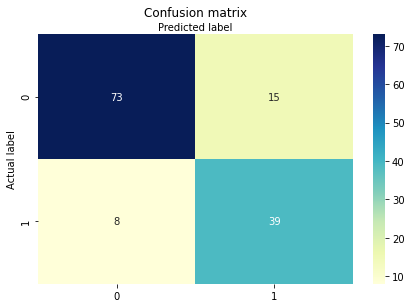

In [34]:
#confusion matrix
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix
#visualising confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8296296296296296
Precision: 0.7222222222222222
Recall: 0.8297872340425532


In [36]:
#Roc curve

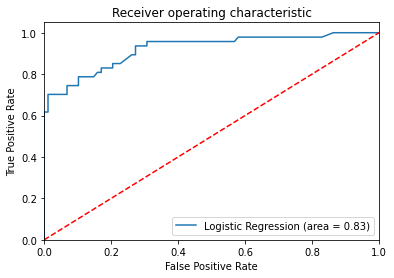

In [37]:
#for X_test
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [38]:
Roc_val_test=logit_roc_auc
print(Roc_val_test)

0.829666344294004


In [39]:
# calculate AUC
auc_test = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc_test)

AUC: 0.830


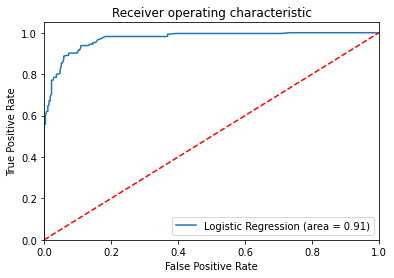

In [40]:
#for X_train
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_train_m, model.predict(X_train_m))
fpr, tpr, thresholds = roc_curve(y_train_m, model.predict_proba(X_train_m)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
Roc_val_train=logit_roc_auc_train
print(Roc_val_train)

0.9069343065693432


In [42]:
change =(0.9069343065693432-0.829666344294004)/0.9069343065693432
change

0.08519686786093734

# Fitting model without Transformation|

In [43]:
import statsmodels.api as sm
logit_model_notrans=sm.Logit(y_,X_)
result_1=logit_model_notrans.fit()
print(result_1.summary2())

Optimization terminated successfully.
         Current function value: 0.225992
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.642     
Dependent Variable:  Target            AIC:               272.7150  
Date:                2021-05-04 04:48  BIC:               337.0049  
No. Observations:    537               Log-Likelihood:    -121.36   
Df Model:            14                LL-Null:           -338.97   
Df Residuals:        522               LLR p-value:       4.7172e-84
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Follicle No. (R)      0.4022   0.0630  6.3830 0.0000  0.2787  0.5257
Follicle No. (L)      0.1382

In [44]:
#Eliminating variables having p-values greater than 0.05
cols_1=['Follicle No. (R)','Follicle No. (L)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 
      'Pimples(Y/N)',' Age (yrs)','Hip(inch)'] 
X_m_1=X_[cols_1]

logit_model_0=sm.Logit(y_,X_m_1)
result_0=logit_model_0.fit()
print(result_0.summary2())

Optimization terminated successfully.
         Current function value: 0.229761
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.636     
Dependent Variable:  Target            AIC:               264.7629  
Date:                2021-05-04 04:48  BIC:               303.3369  
No. Observations:    537               Log-Likelihood:    -123.38   
Df Model:            8                 LL-Null:           -338.97   
Df Residuals:        528               LLR p-value:       3.9868e-88
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Follicle No. (R)      0.4103   0.0635  6.4650 0.0000  0.2859  0.5347
Follicle No. (L)      0.1234

### Oversampling

In [45]:
X_m_1

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Age (yrs),Hip(inch)
0,3,3,0,0,0,2,0,28,36
1,5,3,0,0,0,2,0,36,38
2,15,13,0,0,0,2,1,33,40
3,2,2,0,0,0,2,0,37,42
4,4,3,0,0,0,2,0,25,37
...,...,...,...,...,...,...,...,...,...
536,0,1,0,0,0,2,0,35,28
537,7,9,0,0,1,2,0,30,34
538,0,1,0,0,0,2,0,36,30
539,6,7,0,0,0,4,1,27,28


In [46]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_m_1, y_, test_size=0.25, random_state=0)

X_over_1 = pd.concat([X_train_1, y_train_1], axis=1)

not_pcos_1 = X_over_1[X_over_1.Target==0]
pcos_1 = X_over_1[X_over_1.Target==1]

pcos_upsampled_1 = resample(pcos_1,
                          replace=True, 
                          n_samples=len(not_pcos_1), 
                          random_state=27) 

upsampled_1 = pd.concat([not_pcos_1, pcos_upsampled_1])

upsampled_1.Target.value_counts()

1    274
0    274
Name: Target, dtype: int64

In [77]:
not_pcos_1


,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Age (yrs),Hip(inch),Target
204,6,5,0,0,0,2,1,30,37,0
54,9,5,0,0,0,2,0,32,40,0
30,8,10,0,0,0,2,0,32,34,0
207,4,3,0,0,1,4,1,32,37,0
100,10,7,0,0,0,2,0,30,42,0
...,...,...,...,...,...,...,...,...,...,...
70,2,5,0,0,0,2,0,33,40,0
279,2,3,1,1,1,4,0,26,36,0
9,1,1,0,0,0,4,0,36,40,0
362,1,1,0,0,0,4,0,42,37,0


In [76]:
pcos_1

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Age (yrs),Hip(inch),Target
97,10,13,1,1,1,4,1,31,39,1
49,8,5,1,1,1,4,1,27,38,1
439,13,7,0,0,1,2,1,34,40,1
177,8,11,0,1,1,4,1,24,40,1
540,10,9,1,1,1,4,1,23,48,1
...,...,...,...,...,...,...,...,...,...,...
290,1,1,0,0,0,2,1,27,39,1
148,12,4,0,1,1,4,0,23,45,1
451,18,5,0,0,0,2,0,30,28,1
434,11,8,1,0,1,2,1,23,42,1


In [47]:
upsampled_1

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Age (yrs),Hip(inch),Target
204,6,5,0,0,0,2,1,30,37,0
54,9,5,0,0,0,2,0,32,40,0
30,8,10,0,0,0,2,0,32,34,0
207,4,3,0,0,1,4,1,32,37,0
100,10,7,0,0,0,2,0,30,42,0
...,...,...,...,...,...,...,...,...,...,...
49,8,5,1,1,1,4,1,27,38,1
206,15,16,1,1,1,4,1,24,42,1
434,11,8,1,0,1,2,1,23,42,1
68,9,7,1,1,1,2,1,35,38,1


In [78]:

X_train_notrans=upsampled_1.drop('Target',axis=1)
y_train_notrans=upsampled_1.Target
#Training the Logistic Regression Model

#import the appropriate model from scikit-learn
from sklearn.linear_model import LogisticRegression

#create our model
model_notrans = LogisticRegression()

#Train the model
model_notrans.fit(X_train_notrans,  y_train_notrans)

#Making Predictions With Our Logistic Regression Model
predictions_notrans = model_notrans.predict(X_test_1)
print( np.unique( predictions_notrans ) )
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_notrans.score(X_test_1, y_test_1)))

[0 1]
Accuracy of logistic regression classifier on test set: 0.90


In [80]:
X_test_1

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Age (yrs),Hip(inch)
174,1,1,1,0,1,2,0,37,38
470,10,8,1,1,0,4,0,34,36
198,4,6,0,0,0,2,1,32,35
419,3,3,0,0,0,2,1,36,36
537,7,9,0,0,1,2,0,30,34
...,...,...,...,...,...,...,...,...,...
488,9,5,0,0,1,2,0,36,42
396,9,4,0,0,1,2,1,31,40
528,0,1,0,0,1,2,0,41,42
273,7,8,0,0,0,2,1,30,32


In [82]:
features = {' Age (yrs)': [37,10,60],
              'Hip(inch)':[36,12,55],
            'Cycle(R/I)':[2,4,2],
             'Weight gain(Y/N)':[0,1,1],
             'hair growth(Y/N)':[0,0,1],
             'Skin darkening (Y/N)':[1,0,0],
             
             'Pimples(Y/N)':[0,1,0],
            
             'Follicle No. (L)':[1,4,20],
             'Follicle No. (R)':[1,15,20]
            
  }

df = pd.DataFrame(features,columns= [' Age (yrs)',
 'Hip(inch)',
 'Cycle(R/I)',
 
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 
 'Pimples(Y/N)',
 
 
 'Follicle No. (L)',
 'Follicle No. (R)'])
                                    
print (df)
x=model_notrans.predict(df)
print (x)

    Age (yrs)  Hip(inch)  Cycle(R/I)  Weight gain(Y/N)  hair growth(Y/N)  \
0          37         36           2                 0                 0   
1          10         12           4                 1                 0   
2          60         55           2                 1                 1   

   Skin darkening (Y/N)  Pimples(Y/N)  Follicle No. (L)  Follicle No. (R)  
0                     1             0                 1                 1  
1                     0             1                 4                15  
2                     0             0                20                20  
[1 1 1]


Text(0.5, 257.44, 'Predicted label')

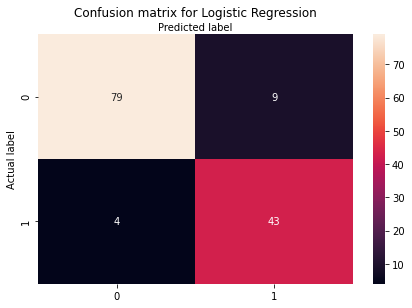

In [49]:
#confusion matrix
# import the metrics class
from sklearn import metrics
cnf_matrix_1 = metrics.confusion_matrix(y_test_1, predictions_notrans)
cnf_matrix_1
#visualising confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True,  fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test_1, predictions_notrans))
print("Precision:",metrics.precision_score(y_test_1, predictions_notrans))
print("Recall:",metrics.recall_score(y_test_1, predictions_notrans))

Accuracy: 0.9037037037037037
Precision: 0.8269230769230769
Recall: 0.9148936170212766


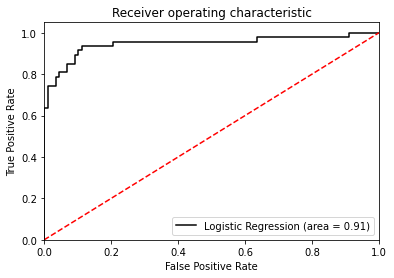

In [51]:
#Roc curve
#for X_test
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_1 = roc_auc_score(y_test_1, model_notrans.predict(X_test_1))
fpr, tpr, thresholds = roc_curve(y_test_1, model_notrans.predict_proba(X_test_1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_1,color='black')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [52]:
Roc_val_test_1=logit_roc_auc_1
print(Roc_val_test_1)

0.9063104448742746


In [53]:
# calculate AUC
auc_test_1 = roc_auc_score(y_test_1, predictions_notrans)
print('AUC: %.3f' % auc_test_1)

AUC: 0.906


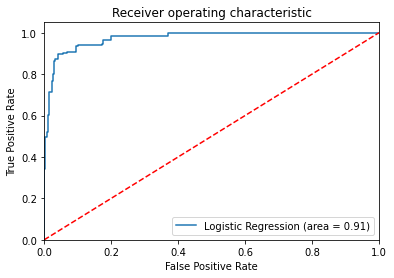

In [54]:
#for X_train
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train_1 = roc_auc_score(y_train_notrans, model_notrans.predict(X_train_notrans))
fpr, tpr, thresholds = roc_curve(y_train_notrans, model_notrans.predict_proba(X_train_notrans)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train_1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
Roc_val_train_1=logit_roc_auc_train
print(Roc_val_train)

0.9069343065693432


In [56]:
change1 =(0.9069343065693432-0.9063104448742746)/0.9069343065693432
change1

0.0006878796959709693

## Decision Trees

oversampling

In [57]:
Xd= pcos_df.drop(labels = ["Target"],axis = 1)
yd=pcos_df.Target

In [58]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3, random_state=0)

Xd_over = pd.concat([Xd_train, yd_train], axis=1)

not_pcos_d = Xd_over[Xd_over.Target==0]
pcos_d = Xd_over[Xd_over.Target==1]

pcos_upsampled_d = resample(pcos_d,
                          replace=True, 
                          n_samples=len(not_pcos_d), 
                          random_state=0) 

upsampled_d = pd.concat([not_pcos_d, pcos_upsampled_d])

upsampled_d.Target.value_counts()

1    254
0    254
Name: Target, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
Xd_o_train= upsampled_d.drop(labels = ["Target"],axis = 1)
yd_o_train=upsampled_d.Target

In [61]:

clf_d = DecisionTreeClassifier()

clf_d = clf_d.fit(Xd_o_train,yd_o_train)


y_pred = clf_d.predict(Xd_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(yd_test, y_pred))
print("Precision:",metrics.precision_score(yd_test, y_pred))
print("Recall:",metrics.recall_score(yd_test, y_pred))

Accuracy: 0.845679012345679
Precision: 0.7843137254901961
Recall: 0.7407407407407407


Text(0.5, 257.44, 'Predicted label')

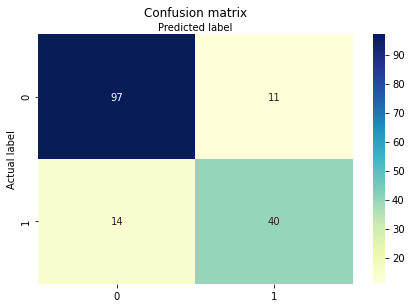

In [63]:
#confusion matrix
# import the metrics class
from sklearn import metrics
cnf_matrix_d = metrics.confusion_matrix(yd_test, y_pred)
cnf_matrix_d
#visualising confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_d), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')